Simple Binary Logistic Regression

In [10]:
#Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [44]:
#Creating Dummy Data

from sklearn.datasets.samples_generator import make_blobs

def fcnCreateDatasets(intSamples):
    X, y = make_blobs(n_samples = intSamples, centers = 2, n_features = 2, cluster_std = 5, random_state = 15)
    return X,y

In [12]:
#Functions for Cost and Hypothesis Functions

def fcnAddBias(X):
    Z = np.insert(X, 0, 1, axis = 1)
    return Z

def fcnApplySigmoidFunction(PredictedVector):
    return 1 / (1 + np.exp(-1 * PredictedVector))

def fcnHypothesisFunction(Weight, X):
    z = np.dot(X, Weight)
    return fcnApplySigmoidFunction(z)

def fcnCostFunction(Weight, X, y):
    y_pred = fcnHypothesisFunction(Weight, X)
    return -1 * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [13]:
#Updating the weights using Gradient Descent

def fcnGradientCalculation(Weight, X, y):
    y_pred = fcnHypothesisFunction(Weight, X)
    g = (1/len(X)) * np.dot(X.T, (y_pred - y))
    return g.reshape(-1,1)

def fcnCalculateWeight(X, y, w_prev, intLR, intEpochs):
    X = fcnAddBias(X)
    CostFunctionValue = np.zeros(intEpochs)
    w_new = w_prev
    for intIterations in range(0, intEpochs):
        w_new = w_new - intLR * fcnGradientCalculation(w_new, X, y)
        CostFunctionValue[intIterations] = fcnCostFunction(w_new, X, y)
    return w_new, CostFunctionValue
        

The Weight is : [[0]
 [0]
 [0]] and Cost Function value is : 138.62943611198904
The Weight is : [[ 0.51156485]
 [-0.94198976]
 [ 0.18367964]] and Cost Function value is : 18.168206369040018


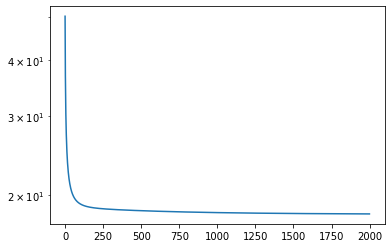

In [57]:
#Generating fake data and Calculating Weights

x, y = fcnCreateDatasets(200)
y = y.reshape(-1,1)
W = np.array([0, 0, 0]).reshape(-1,1)

Weight, CostFunctionValue = fcnCalculateWeight(x, y, W, 0.05, 2000)
print("The Weight is : {} and Cost Function value is : {}".format(W, fcnCostFunction(W, fcnAddBias(x), y)))
print("The Weight is : {} and Cost Function value is : {}".format(Weight, fcnCostFunction(Weight, fcnAddBias(x), y)))
plt.semilogy(CostFunctionValue)

In [52]:
from sklearn.linear_model  import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(x,y)
print("The Weight is : {} and Bias value is : {}".format(LogReg.coef_, LogReg.intercept_))

The Weight is : [[-0.92519753  0.19088044]] and Bias value is : [0.61720587]


C:\Users\RISHABH CHOUDHARY\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


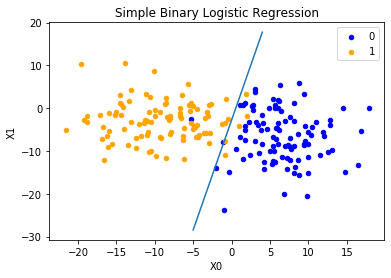

In [61]:
#Plotting the dataset

def fcnGraph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x,y)
    
def fcnLine(x):
    return (- Weight[0] - Weight[1] * x) / Weight[2]

df = pd.DataFrame(dict(x = x[:,0], y = x[:,1], label = y.reshape(-1)))
colors = {0 : 'blue', 1 : 'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
fcnGraph(fcnLine, range(-5, 5))
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Simple Binary Logistic Regression")
plt.show()